In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Data Pre-processing - Load Data, Clean Data

### Read Resume Dataset

In [2]:
df_resume = pd.read_csv('./dataset/resume_dataset.csv' ,encoding='utf-8')
df_resume.head(3)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."


### Rename Column Names

In [3]:
df_resume = df_resume.rename(columns={'Category': 'category', 'Resume': 'resume'})
df_resume.head(3)

,category,resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."


### Functions to Clean resume and job description - 2 steps (2 function)

In [4]:
import re

# clean step 1
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText


# clean step 2
def clean_sentence(sentence: str):
    '''Function that takes in a string and outputs a cleaned version without non-alphabetic characters'''
    # replace non-alphabetic characters with spaces
    sentence = re.sub('[^A-Za-z]', ' ', sentence)
    ## YOUR CODE HERE
    sentence = " ".join(sentence.split()).lower() #remove extra and trailing space + map to lower case
    return sentence

In [5]:
# clean step 1
df_resume['step1_cleaned_resume'] = df_resume.resume.apply(lambda x: cleanResume(x))

# clean step 2
df_resume = df_resume.assign(final_cleaned_resume = df_resume.step1_cleaned_resume.apply(clean_sentence))
df_resume.head(5)

,category,resume,step1_cleaned_resume,final_cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,education details may to may b e uit rgpv data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,education details mca ymcaust faridabad haryan...


### Basic Visualization on Resume Dataset

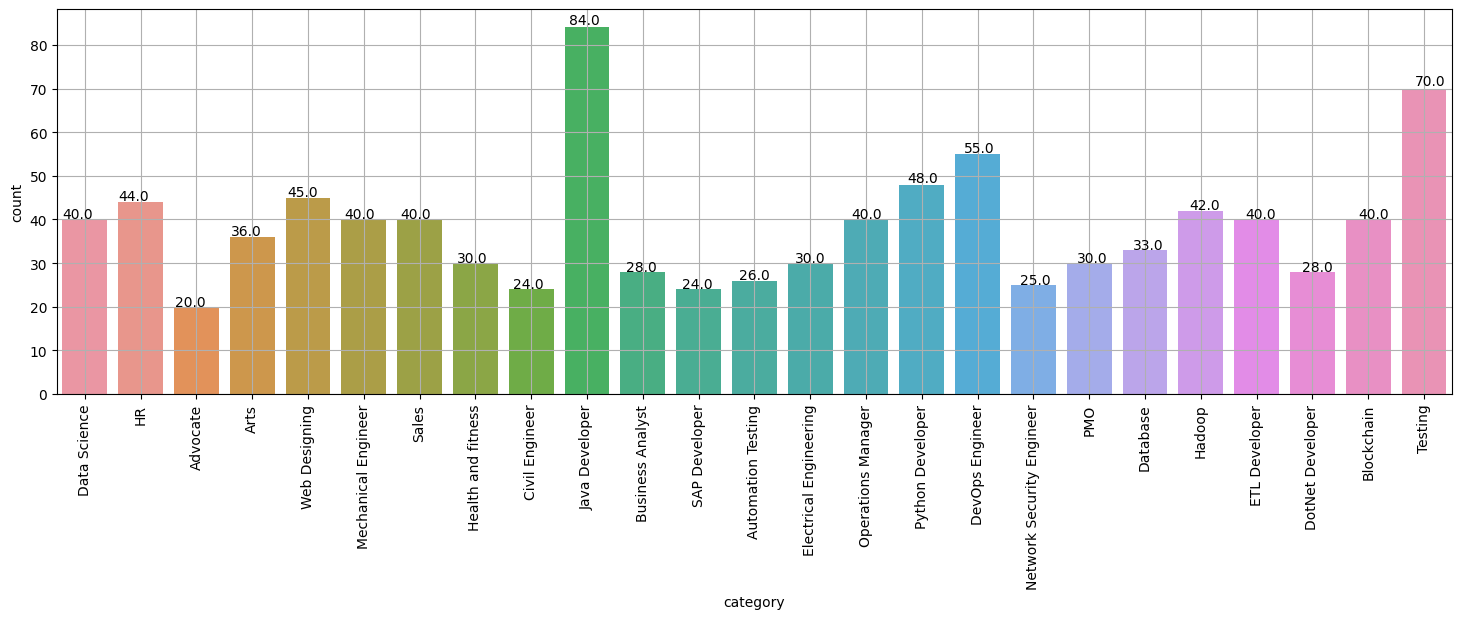

In [6]:
import seaborn as sns
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="category", data=df_resume)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

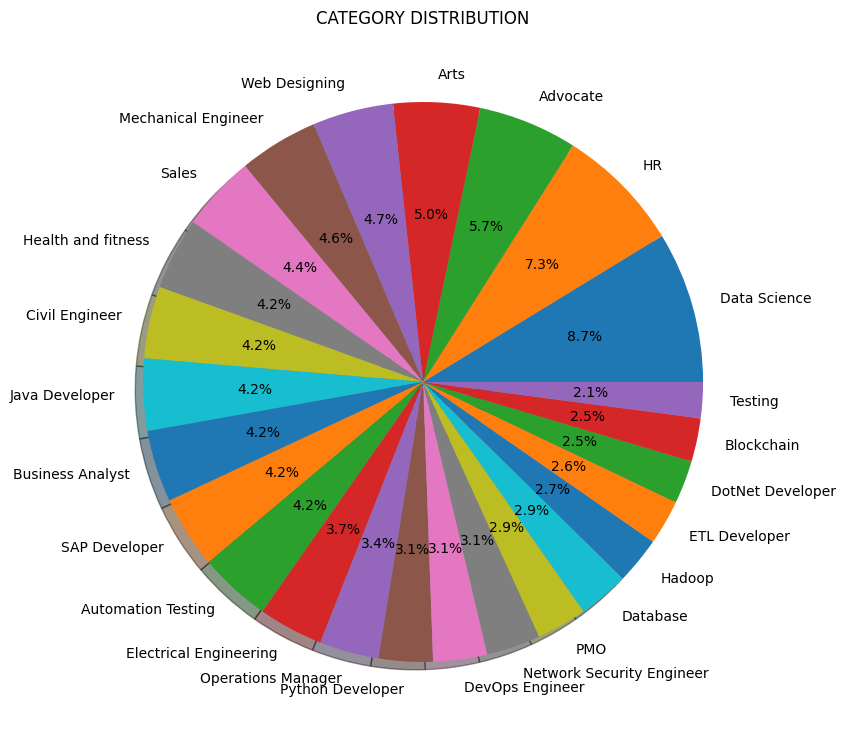

In [7]:
from matplotlib.gridspec import GridSpec
targetCounts = df_resume['category'].value_counts()
targetLabels  = df_resume['category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

### Test NLTK Library - Natural Language Toolkit is a Python software library for automatic language processing, developed by Steven Bird and Edward Loper of the Department of Computer Science at the University of Pennsylvania.

In [8]:
import nltk

In [9]:
sentence = """At eight o'clock on Thursday morningl, Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
print(tokens)

sentence = """At eight o'clock on Thursday morning, Arthur didn't feel very good."""
tokens = nltk.sent_tokenize(sentence)
print(tokens)

['At', 'eight', "o'clock", 'on', 'Thursday', 'morningl', ',', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']
["At eight o'clock on Thursday morning, Arthur didn't feel very good."]


## Test BERT - Transformers - Calculate Sentence Vector Value - Pytorch

### Install Pytorch

In [10]:
# conda install pytorch torchvision torchaudio -c pytorch

In [11]:
import transformers
import torch

In [12]:
# count max text length in Dataset
def count_words(sentence):
  words = sentence.split()
  return len(words)

In [13]:
# max(df_resume['final_cleaned_resume'].apply(count_words))

In [14]:
MODEL_NAME = "bert-base-uncased"
# Load the pre-trained BERT model
model = transformers.BertModel.from_pretrained(MODEL_NAME)

In [15]:
# Tokenize the sentence
MAX_LEN = max(df_resume['final_cleaned_resume'].apply(count_words)) #1970
tokenizer = transformers.BertTokenizer.from_pretrained(MODEL_NAME)
sentence = "This is a sentence."
tokens = tokenizer(sentence, return_tensors="pt")
tokens

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 6251, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [16]:
# Encode the sentence
with torch.no_grad():
    embeddings = model(tokens["input_ids"])

# embeddings

In [17]:
# Get the vector value of the sentence
# sentence_vector_1 = embeddings[0, 0]
sentence_vector_1 = embeddings[0][0]

# Print the sentence vector
print(sentence_vector_1)
# print(len(sentence_vector_1))

tensor([[-0.0644,  0.0705, -0.0841,  ..., -0.3616, -0.0067,  0.7863],
        [-0.3563, -0.1226, -0.2021,  ..., -0.5811,  0.0828,  0.5464],
        [-0.0467, -0.1944,  0.6169,  ..., -0.0335,  0.1858,  1.1828],
        ...,
        [ 0.4653, -0.0109,  0.2943,  ...,  0.0623, -0.3461,  0.0915],
        [ 0.0488, -0.8145, -0.0122,  ...,  0.3679,  0.3795,  0.0021],
        [ 0.5486,  0.2635,  0.0184,  ...,  0.1237, -0.8125, -0.0936]])


In [18]:
sentence = "This is not a sentence."
tokens = tokenizer(sentence, return_tensors="pt")
tokens

# Encode the sentence
with torch.no_grad():
    embeddings = model(tokens["input_ids"])

# Get the vector value of the sentence
sentence_vector_2 = embeddings[0][0]
sentence_vector_2

tensor([[ 0.0595,  0.0031, -0.2756,  ..., -0.1009,  0.0621,  0.6508],
        [-0.3269, -0.0756, -0.3591,  ..., -0.5408,  0.2976,  0.5391],
        [-0.0526, -0.3767,  0.1056,  ..., -0.0171,  0.0794,  0.8740],
        ...,
        [ 0.5923, -0.2479,  0.2616,  ...,  0.0172, -0.4598,  0.0550],
        [ 0.2669, -0.1163, -0.6349,  ...,  0.3325, -0.0389, -0.5534],
        [ 0.6324,  0.2408, -0.1437,  ...,  0.3448, -0.6824, -0.3500]])

In [19]:
def cosine_similarity(vector1, vector2):
  
  cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
  return cosine_similarity


In [20]:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

cosine_similarity(vector1, vector2)

0.9746318461970762

## Using SBERT.net - Link: https://www.sbert.net/

### Install SBERT

In [21]:
# pip install -U sentence-transformers

In [22]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

sentence_1 = ['This is a sentence.']
sentence_2 = ['This is a sentence!']

#Sentences are encoded by calling model.encode()
embedding_1 = model.encode(sentence_1)
embedding_2 = model.encode(sentence_2)

#Print the embeddings
# for sentence, embedding in zip(sentences, embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")

print(embedding_1)
print(embedding_2)

[[ 8.21104795e-02  9.57397595e-02  1.09745944e-02  3.99054661e-02
   3.58275371e-03  2.37624273e-02 -7.54146790e-03 -3.96368578e-02
   7.53305703e-02  2.61354744e-02  7.67544359e-02 -4.00632918e-02
  -6.95464085e-04 -1.24402512e-02  2.72367359e-03  1.70455109e-02
   4.06565070e-02 -4.97856848e-02 -4.39753570e-02  1.42886750e-02
   1.36177465e-02  9.14743096e-02  1.47043169e-02  7.73379207e-03
   8.07984732e-03  7.28773139e-03 -4.63310406e-02  8.05791989e-02
   4.26285714e-02 -8.81181192e-03 -4.51243483e-02 -7.66325602e-03
   5.41319400e-02  4.92666364e-02  2.95620393e-02 -1.62078664e-02
   4.43056505e-03  4.29377221e-02  3.99924524e-04 -1.56983528e-02
   3.21975090e-02 -1.88571345e-02  3.39318290e-02  2.10538786e-02
  -9.60183609e-03  5.55283250e-03 -1.30040962e-02 -3.12801711e-02
  -4.37226566e-03 -2.12491453e-02 -9.58888680e-02 -8.21872279e-02
  -2.51270458e-02 -1.54144026e-03  1.06393239e-02  4.45451736e-02
   8.37606043e-02 -7.25319423e-03  3.55597138e-02  4.33874829e-03
  -3.71676

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# # Define your arrays
# a = np.array([23, 34, 44, 45, 42, 27, 33, 34])
# b = np.array([17, 18, 22, 26, 26, 29, 31, 30])

# # Calculate cosine similarity
# cos_sim = cosine_similarity([a], [b])

# print(cos_sim[0][0])

cosine_similarity(embedding_1, embedding_2)

array([[0.8843454]], dtype=float32)

### Read Job Description Dataset

In [24]:
df_jd = pd.read_excel('./dataset/job_description.xlsx')

df_jd_it_job_only = df_jd[df_jd['Job_Category'] == 'IT'] # dataframe job related to IT

### Rename Column Names

In [25]:
df_jd = df_jd[['Position', 'Job_Description']]
df_jd = df_jd.rename(columns={'Position': 'position', 'Job_Description': 'job_description'})
df_jd.head(3)

,position,job_description
0,Poster Designer,Japnese language understanding. Video editing ...
1,BOA-Registered Architect/ Senior Architect,2 positions for cambodia boa registered archit...
2,Interior Architect/ Intermediate Interior Desi...,The company is seeking an experienced INTERIOR...


### Clean Job Description Dataset

In [26]:
# clean step 1
df_jd['step1_cleaned_jd'] = df_jd.job_description.apply(lambda x: cleanResume(x))

# clean step 2
df_jd = df_jd.assign(final_cleaned_jd = df_jd.step1_cleaned_jd.apply(clean_sentence))
df_jd.head(3)

,position,job_description,step1_cleaned_jd,final_cleaned_jd
0,Poster Designer,Japnese language understanding. Video editing ...,Japnese language understanding Video editing w...,japnese language understanding video editing w...
1,BOA-Registered Architect/ Senior Architect,2 positions for cambodia boa registered archit...,2 positions for cambodia boa registered archit...,positions for cambodia boa registered architec...
2,Interior Architect/ Intermediate Interior Desi...,The company is seeking an experienced INTERIOR...,The company is seeking an experienced INTERIOR...,the company is seeking an experienced interior...


In [27]:
df_jd = df_jd.head(1000)

### Compare 1 Resume and 1 Job Description

In [28]:
resume_description = df_resume.head(1)['final_cleaned_resume']
sentence_1 = [resume_description[0]]
sentence_1

['skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the review proc

In [29]:
job_description = df_jd.head(1)['final_cleaned_jd']
sentence_2 = [job_description[0]]
sentence_2

['japnese language understanding video editing with adobe photoshop illustrator with japanese language']

In [30]:
embedding_1 = model.encode(sentence_1)
embedding_2 = model.encode(sentence_2)

In [31]:
similarity_rate = cosine_similarity(embedding_1, embedding_2)
print("==============================================================+")
print("Resume-JobDescription Similarity (CosineSimilarity):", similarity_rate[0][0])
print("==============================================================+")

==============================================================+
Resume-JobDescription Similarity (CosineSimilarity): 0.13304749
==============================================================+


### Compare 5 Resume to 1 Job Description - Random

In [32]:
resume_5 = df_resume.sample(n=5)
resume_5

,category,resume,step1_cleaned_resume,final_cleaned_resume
563,Python Developer,Technical Skills / Responsibilities: â¢ Hands...,Technical Skills Responsibilities Hands on Exp...,technical skills responsibilities hands on exp...
726,Database,"Technical Skills Databases: Oracle RDBMS- 10g,...",Technical Skills Databases Oracle RDBMS 10g 11...,technical skills databases oracle rdbms g g c ...
263,Sales,IT Skills: MS Office. Photoshop. SQL Server.Ed...,IT Skills MS Office Photoshop SQL Server Educa...,it skills ms office photoshop sql server educa...
498,Electrical Engineering,â¢ Achievement oriented with people managemen...,Achievement oriented with people management s...,achievement oriented with people management sk...
177,Web Designing,"Technical Skills Web Technologies: Angular JS,...",Technical Skills Web Technologies Angular JS H...,technical skills web technologies angular js h...


In [33]:
# job_description = df_jd.head(1)['final_cleaned_jd']
job_description = df_jd.sample(n=1)
job_description

jd = ''
for index, row in job_description.iterrows():
    jd = row['final_cleaned_jd']

In [34]:
ranking_dict = {}

for index, row in resume_5.iterrows():
    print("Resume           :", row['final_cleaned_resume'])
    print("Job Description  :", jd)
    resume = row['final_cleaned_resume']
    
    embedding_1 = model.encode([resume])
    embedding_2 = model.encode([jd])

    similarity_rate = cosine_similarity(embedding_1, embedding_2)
    print("Similarity Rate  :", format(similarity_rate[0][0]*100, '.2f')+'%')
    print()
    ranking_dict[index] = float(format(similarity_rate[0][0]*100, '.2f'))

print(ranking_dict)

Resume           : technical skills responsibilities hands on experience with production and maintenance of projects experience in handling projects in agile methodology experience in handling projects in sdlc involved in each stage of software development life cycle responsible to gather requirement customer interaction and providing estimate solution document then as per process fs ts coding utp utr ptf sow submission to customer having strong knowledge of debugging and testing based on python and as worked as change controller responsible for promoting changes in development to uat and live environment through pivotal cloud foundry have good communication skills inter personal skills hardworking and result oriented as an individual and in team certification and trainings completed internal python training completed internal python web crawling training completed internal python web scraping training completed internal python for data science training completed internal mongodb train

In [35]:
sorted_ranking_resume = dict(sorted(ranking_dict.items(), key=lambda item: item[1], reverse=True))
sorted_ranking_resume

{263: 61.53, 726: 47.65, 177: 46.3, 563: 43.83, 498: 40.16}

In [36]:
for key in sorted_ranking_resume:
    print('Index:', key, '-' , str(sorted_ranking_resume[key]) + '%')

Index: 263 - 61.53%
Index: 726 - 47.65%
Index: 177 - 46.3%
Index: 563 - 43.83%
Index: 498 - 40.16%


### Compare 5 Resume to 1 Job Description - Static

In [37]:
first_5_resume = df_resume.head(5)

first_jd = df_jd.head(1)
jd = first_jd['final_cleaned_jd'][0]

In [38]:
ranking_dict = {}

for index, row in first_5_resume.iterrows():
    print("Resume           :", row['final_cleaned_resume'])
    print("Job Description  :", first_jd['final_cleaned_jd'][0])
    resume = row['final_cleaned_resume']
    
    embedding_1 = model.encode([resume])
    embedding_2 = model.encode([jd])

    similarity_rate = cosine_similarity(embedding_1, embedding_2)
    print("Similarity Rate  :", format(similarity_rate[0][0]*100, '.2f')+'%')
    print()
    ranking_dict[index] = float(format(similarity_rate[0][0]*100, '.2f'))

print(ranking_dict)

Resume           : skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a eleratin

Similarity Rate  : 13.30%

Resume           : education details may to may b e uit rgpv data scientist data scientist matelabs skill details python exprience less than year months statsmodels exprience months aws exprience less than year months machine learning exprience less than year months sklearn exprience less than year months scipy exprience less than year months keras exprience less than year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts a koramangala th block achievements tasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regression model linkedin com in aditya rathore b b reasearch and deployed the time series forecasting model arima sarimax holt winter and prophet worked on meta feature extracting problem

In [39]:
sorted_ranking_resume = dict(sorted(ranking_dict.items(), key=lambda item: item[1], reverse=True))
sorted_ranking_resume

{0: 13.3, 2: 10.08, 4: 7.29, 3: 3.37, 1: 1.42}

In [40]:
for key in sorted_ranking_resume:
    print('Index:', key, '-' , str(sorted_ranking_resume[key]) + '%')

Index: 0 - 13.3%
Index: 2 - 10.08%
Index: 4 - 7.29%
Index: 3 - 3.37%
Index: 1 - 1.42%


### Compare Resume and Job Description only job related to "IT"

In [41]:
df_jd_it_job_only = df_jd_it_job_only[['Position', 'Job_Description']]
df_jd_it_job_only = df_jd_it_job_only.rename(columns={'Position': 'position', 'Job_Description': 'job_description'})
df_jd_it_job_only.head(3)

,position,job_description
95,Accelerated Skills & Knowledge,Introduction. Amret has developed a dedicated ...
675,Accounting & System Coordinator,Daily support on system issue error from users...
991,Acquiring & Ecommerce Officer,Key responsibilities. Onsite offsite training ...


In [42]:
# clean step 1
df_jd_it_job_only['step1_cleaned_jd'] = df_jd_it_job_only.job_description.apply(lambda x: cleanResume(x))

# clean step 2
df_jd_it_job_only = df_jd_it_job_only.assign(final_cleaned_jd = df_jd_it_job_only.step1_cleaned_jd.apply(clean_sentence))
df_jd_it_job_only.head(3)

,position,job_description,step1_cleaned_jd,final_cleaned_jd
95,Accelerated Skills & Knowledge,Introduction. Amret has developed a dedicated ...,Introduction Amret has developed a dedicated p...,introduction amret has developed a dedicated p...
675,Accounting & System Coordinator,Daily support on system issue error from users...,Daily support on system issue error from users...,daily support on system issue error from users...
991,Acquiring & Ecommerce Officer,Key responsibilities. Onsite offsite training ...,Key responsibilities Onsite offsite training a...,key responsibilities onsite offsite training a...


In [43]:
first_5_resume = df_resume.head(5)

first_5_resume

,category,resume,step1_cleaned_resume,final_cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,education details may to may b e uit rgpv data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,education details mca ymcaust faridabad haryan...


In [44]:
first_jd = df_jd_it_job_only.head(1)

jd = ''
for index, row in first_jd.iterrows():
    jd = row['final_cleaned_jd']

jd

'introduction amret has developed a dedicated program for students who are studying from year or fresh graduate in the field of information technology to get a good opportunity of skills practice after learning in the classroom as well as get coaching directly from it professionals with many year experience why join a elerated skills knowledge ask program practical skill program gain professional working experience directly coached by our it professionals attractive allowance monthly allowance up to per month plus national social security fund nssf job opportunity with amret qualified and competent interns are prioritized for an available job with amret'

In [45]:
ranking_dict = {}

for index, row in first_5_resume.iterrows():
    print("Resume           :", row['final_cleaned_resume'])
    print("Job Description  :", jd)
    resume = row['final_cleaned_resume']
    
    embedding_1 = model.encode([resume])
    embedding_2 = model.encode([jd])

    similarity_rate = cosine_similarity(embedding_1, embedding_2)
    print("Similarity Rate  :", format(similarity_rate[0][0]*100, '.2f')+'%')
    print()
    ranking_dict[index] = float(format(similarity_rate[0][0]*100, '.2f'))

print(ranking_dict)

Resume           : skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a eleratin

Similarity Rate  : 32.39%

Resume           : education details may to may b e uit rgpv data scientist data scientist matelabs skill details python exprience less than year months statsmodels exprience months aws exprience less than year months machine learning exprience less than year months sklearn exprience less than year months scipy exprience less than year months keras exprience less than year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts a koramangala th block achievements tasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regression model linkedin com in aditya rathore b b reasearch and deployed the time series forecasting model arima sarimax holt winter and prophet worked on meta feature extracting problem

In [46]:
sorted_ranking_resume = dict(sorted(ranking_dict.items(), key=lambda item: item[1], reverse=True))
sorted_ranking_resume

{4: 43.55, 2: 38.41, 0: 32.39, 3: 30.26, 1: 27.1}

In [47]:
for key in sorted_ranking_resume:
    print('Index:', key, '-' , str(sorted_ranking_resume[key]) + '%')

Index: 4 - 43.55%
Index: 2 - 38.41%
Index: 0 - 32.39%
Index: 3 - 30.26%
Index: 1 - 27.1%


## Test OOP

In [48]:
class Dog:

    # attribute
    attr1 = 'mamal'

    # instance attribute
    def __init__(self, name):
        self.name = name

    def speak(self):
        print("My name is {}".format(self.name))

Rodger = Dog('Rodger')
Tommy = Dog('Tommy')

# Accessing class attributes
print("Rodger is a {}".format(Rodger.__class__.attr1))
print("Tommy is also a {}".format(Tommy.__class__.attr1))
 
# Accessing instance attributes
print("My name is {}".format(Rodger.name))
print("My name is {}".format(Tommy.name))

Rodger.speak()
Tommy.speak()

Rodger is a mamal
Tommy is also a mamal
My name is Rodger
My name is Tommy
My name is Rodger
My name is Tommy
